In [1]:
#Here I import the needed libraries as done in the above 2 workbooks
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

import sklearn
from sklearn.linear_model import LinearRegression

import openpyxl
from openpyxl.drawing.image import Image
from openpyxl.chart import ScatterChart, Reference, Series
from openpyxl.utils.dataframe import dataframe_to_rows

import watermark

In [2]:
plt.style.use('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/d4sci.mplstyle')


In [3]:
#creating a new sheet
book = openpyxl.Workbook()
sheet = book.active
sheet.title = 'Formulas'
sheet.dimensions


'A1:A1'

In [7]:
#Adding few data in it
sheet['A1'] = 'x'
sheet['B1'] = 'y'

rows = np.arange(20).reshape(10, 2)

for row in rows:
    sheet.append(list(row))
    

In [8]:
sheet.dimensions


'A1:B41'

# simple formula for the totals

In [11]:
sheet['A12'] = "=SUM(A2:A11)"
sheet['B12'] = "=SUM(B2:B11)"

#save the workbook
book.save('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/formula.xlsx')
sheet['B12'].value


'=SUM(B2:B11)'

In [12]:
sheet['A12'].value


'=SUM(A2:A11)'

In [13]:
print(openpyxl.utils.FORMULAE)


frozenset({'PRICEMAT', 'TYPE', 'SUBSTITUTE', 'FREQUENCY', 'PERCENTILE', 'GESTEP', 'HEX2BIN', 'ACCRINTM', 'DB', 'AVERAGEA', 'GEOMEAN', 'TEXT', 'RSQ', 'RIGHTB', 'AVERAGEIF', 'FIXED', 'IF', 'COLUMN', 'FV', 'BIN2DEC', 'WORKDAY.INTL', 'COS', 'TBILLYIELD', 'WEEKDAY', 'ODDFPRICE', 'DMIN', 'COMBIN', 'COUNTBLANK', 'DVARP', 'RANK', 'SUMPRODUCT', 'SUMIF', 'ZTEST', 'LOOKUP', 'EDATE', 'LEFT', 'DSTDEVP', 'CHOOSE', 'COUNTA', 'TIME', 'COVAR', 'CHIINV', 'MDURATION', 'SLN', 'SUMX2PY2', 'IMLOG10', 'SIN', 'FACTDOUBLE', 'PV', 'MEDIAN', 'CRITBINOM', 'YEAR', 'SEARCHB', 'FALSE', 'TRANSPOSE', 'AMORLINC', 'IMLN', 'STDEV STDEVA', 'CLEAN', 'ROW', 'MIN', 'ASIN', 'NOT', 'ISTEXT', 'XIRR', 'DOLLARDE', 'ROWS', 'SINH', 'COUPPCD', 'LOG10', 'INDEX', 'SECOND', 'NORMSINV', 'RANDBETWEEN', 'GAMMAINV', 'IMPRODUCT', 'LEN', 'HEX2OCT', 'CUMIPMT', 'COUPDAYBS', 'SMALL', 'IMABS', 'VARA', 'YEARFRAC', 'NPV', 'MIRR', 'ISODD', 'MOD', 'ABS', 'GCD', 'RAND', 'PERMUT', 'TTEST', 'GAMMADIST', 'TINV', 'CONFIDENCE', 'ODDFYIELD', 'SUMX2MY2', 'F

# Adding  few images

In [14]:
sheet = book.create_sheet(title='Add_Images')
sheet['A1'] = 'Lakehead University'


img = Image('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/lakehead.png')
sheet.add_image(img, 'B1')
book.save('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/formula.xlsx')




# performing a linear fit, generate a plot and add it to the worksheet

In [15]:
data = pd.read_csv('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/Anscombe1.dat', header=None, sep=' ')
data.shape

(11, 2)

In [16]:

sheet['A31'] = 'X'
sheet['B31'] = 'Y'


for x, y in data.values:
    sheet.append((x, y))

In [19]:
lr = LinearRegression()
lr.fit(data[[0]], data[[1]])

y2 = lr.predict(data[[0]])
lr.coef_


array([[0.50009091]])

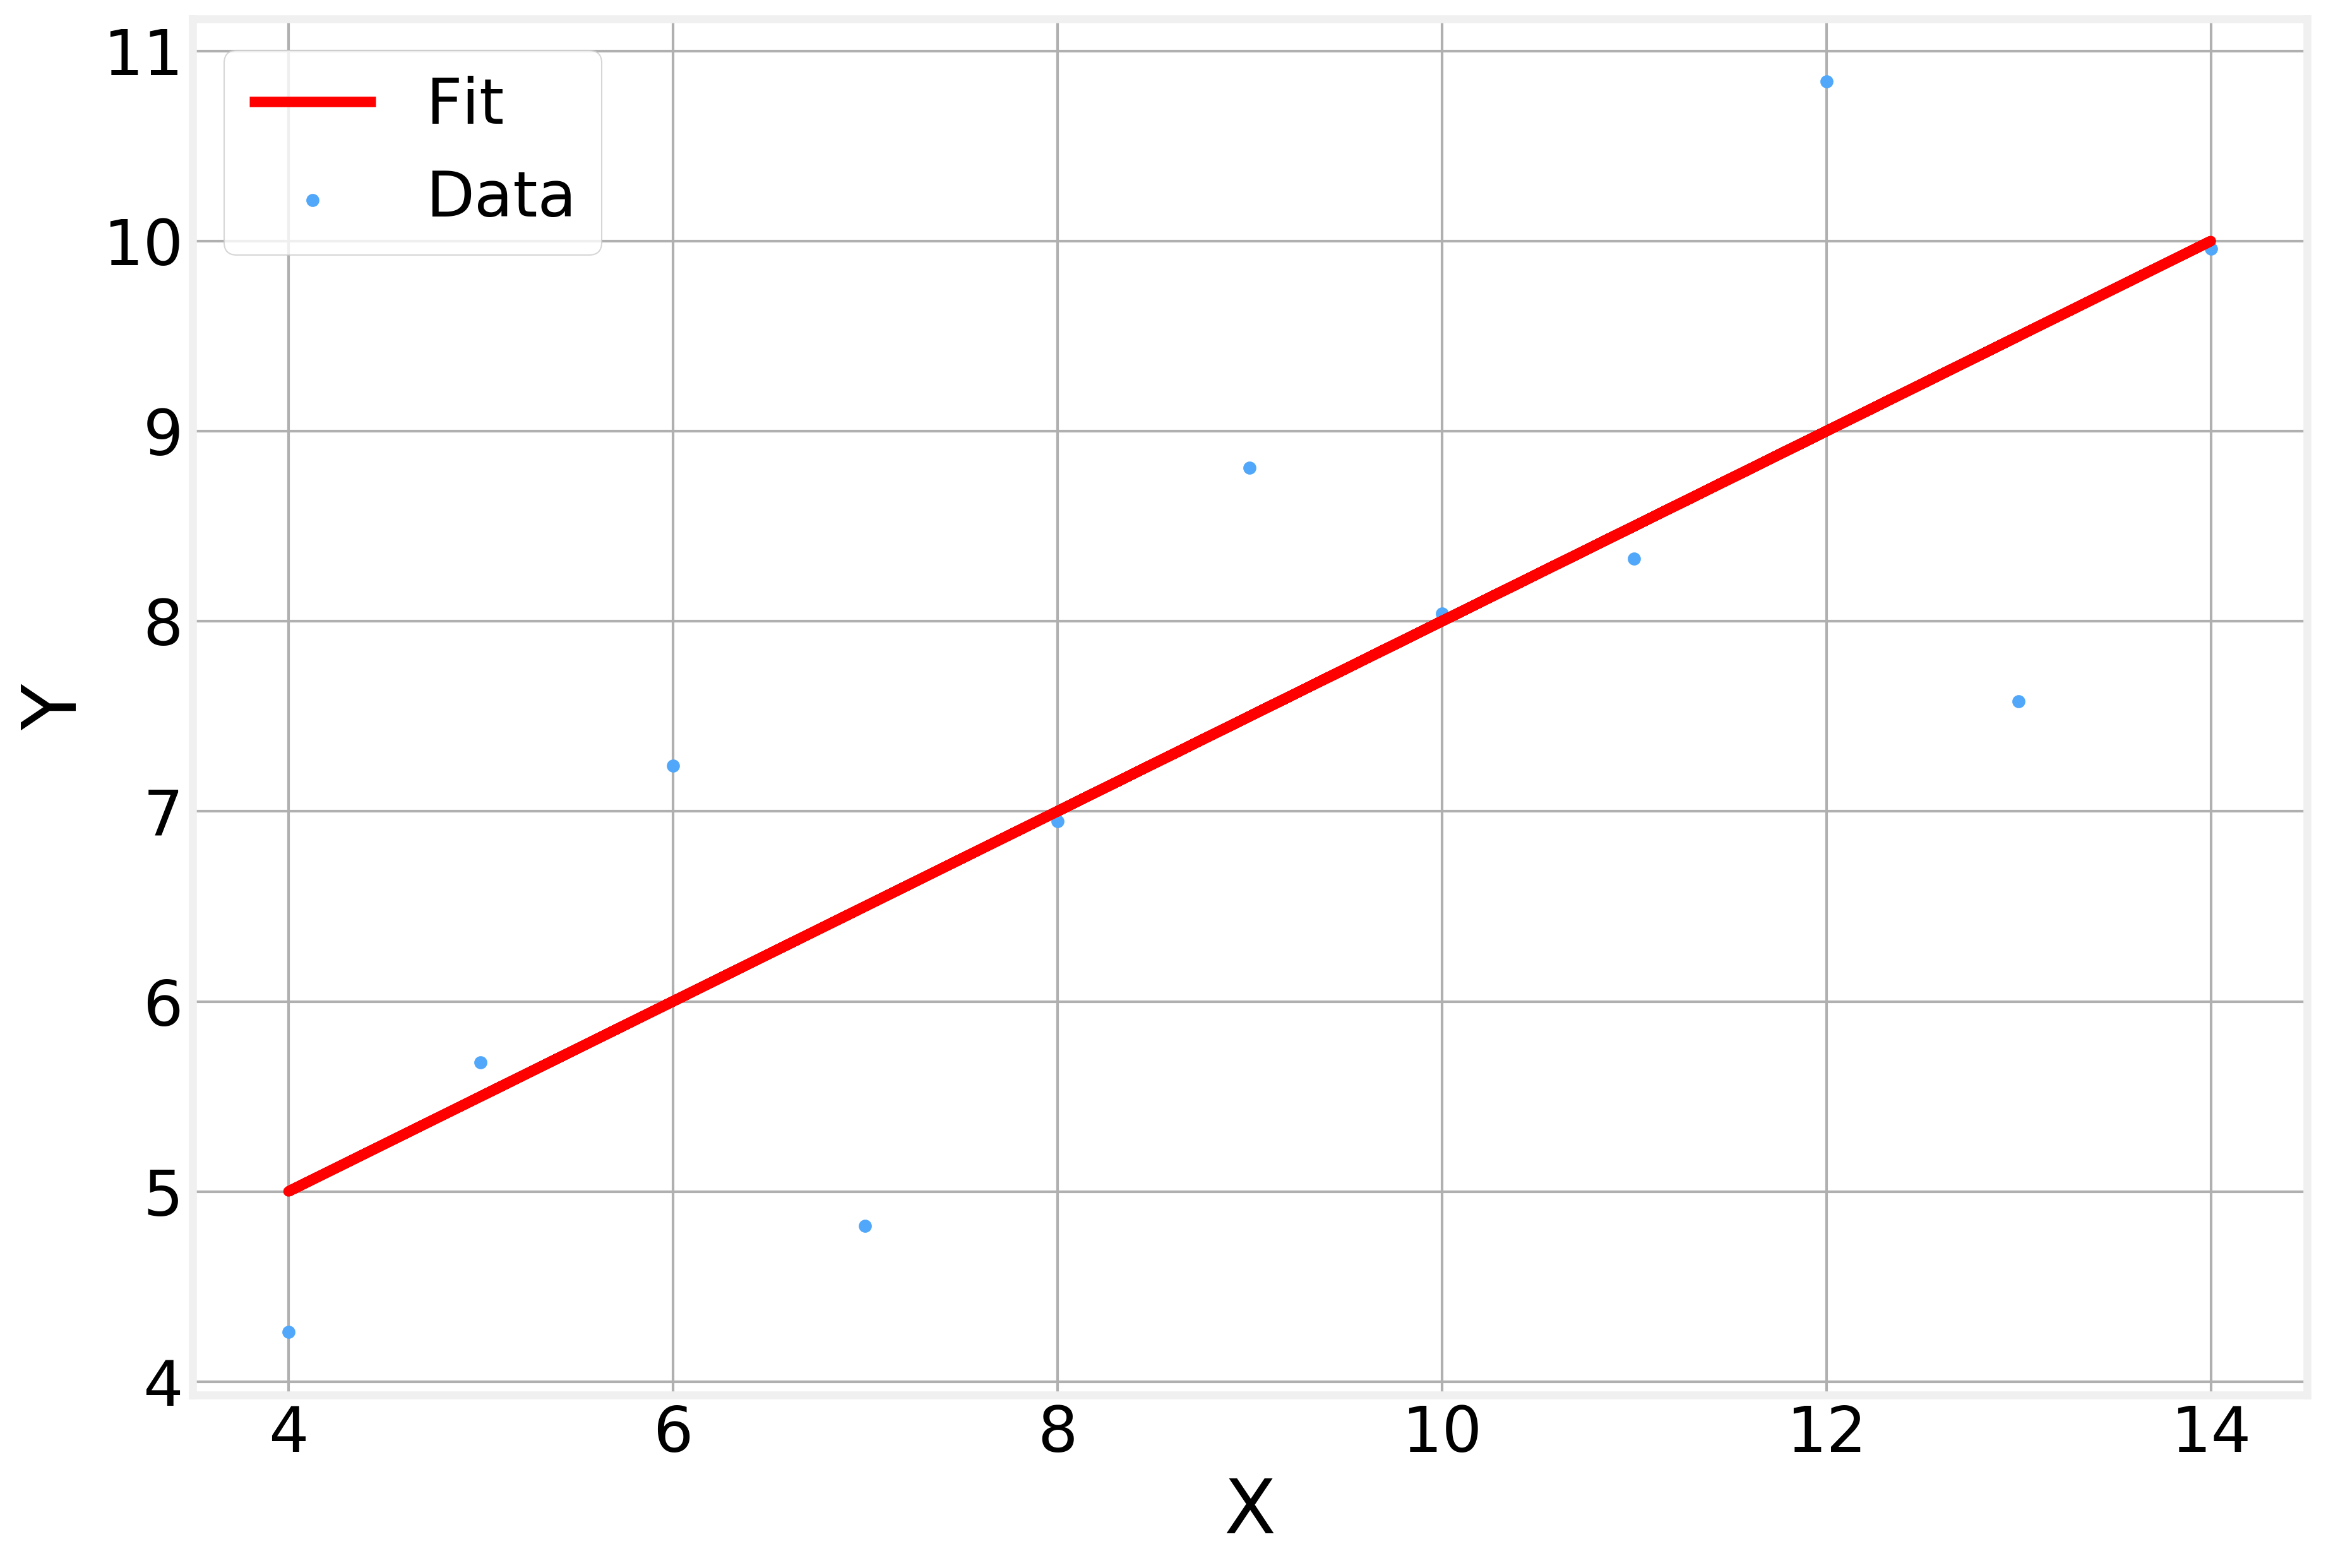

In [21]:
#Now here I plot it out and save the file in my root directory

ax = data.plot.scatter(x=0, y=1, label='Data')
ax.plot(data[0], y2, c='r', label='Fit')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.savefig('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/lr_examples.png', dpi=72)

# Now we can add it to the worksheet

In [24]:
img = Image('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/lr_examples.png')
sheet.add_image(img, 'D31')
book.save('C:/Users/Abhishek Nagrecha/Desktop/Excel-master/data/formula.xlsx')

